In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd
import matplotlib.pyplot as plt
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# convert categories to one-hot
insurance_onehot = pd.get_dummies(insurance)
print(insurance_onehot.head())

X = insurance_onehot.drop('charges',axis=1)
y = insurance_onehot[['charges']]
print(X.head(), y.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

In [3]:
# split training and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=12)

# normalize numerical value
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrainnorm = scaler.transform(xtrain) # output is numpy array
xtestnorm = scaler.transform(xtest)

# Another option to normalize and onehotencode

# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# # Create column transformer (this will help us normalize/preprocess our data)
# ct = make_column_transformer(
#     (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
#     (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
# )


In [73]:
tf.random.set_seed(12)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# define model
tf.keras.backend.clear_session()
model = Sequential([
    Dense(10),
    Dense(500),
    Dense(500),
    Dense(10),
    Dense(1)
])

model.compile(loss= 'mae',
              optimizer = 'adam',
              metrics = 'mae'
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, 
                              min_delta=5.0,
                              mode='min',
                              min_lr=0.0001)

earlystopping = EarlyStopping(monitor='val_loss',
                             min_delta=0.01,
                             patience=15)

filepath='./my_regr_model.h5'
modelcheckpoint = ModelCheckpoint(filepath=filepath, save_best_only=True)


history = model.fit(xtrainnorm,ytrain,epochs=100, callbacks=[reduce_lr,earlystopping, modelcheckpoint], validation_data=(xtestnorm,ytest))

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 13131.9199 - mae: 13131.9199 - val_loss: 12283.5361 - val_mae: 12283.5361 - lr: 0.0010
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 10252.5635 - mae: 10252.5635 - val_loss: 7867.9937 - val_mae: 7867.9937 - lr: 0.0010
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8128.4561 - mae: 8128.4561 - val_loss: 7205.6851 - val_mae: 7205.6851 - lr: 0.0010
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7293.5244 - mae: 7293.5244 - val_loss: 6414.9731 - val_mae: 6414.9731 - lr: 0.0010
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 6063.6562 - mae: 6063.6562 - val_loss: 5011.1299 - val_mae: 5011.1299 - lr: 0.0010
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 4665.9014 - mae: 4665.9014 - val_loss: 4291.5850 - val_mae: 4291.5850 - lr: 0.0010
Epoch 7/100
34/34 [==============================] - 0s 4m

In [68]:
model.evaluate(xtestnorm,ytest)

9/9 [==============================] - 0s 2ms/step - loss: 3593.7095 - mae: 3593.7095


[3593.70947265625, 3593.70947265625]

<AxesSubplot:>

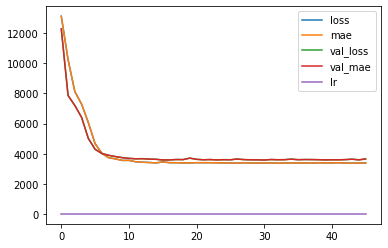

In [63]:
pd.DataFrame(history.history).plot()

In [69]:
bestmodel = tf.keras.models.load_model(filepath)
bestmodel.evaluate(xtestnorm,ytest)

9/9 [==============================] - 0s 2ms/step - loss: 3585.4553 - mae: 3585.4553


[3585.455322265625, 3585.455322265625]

In [72]:
filepath

'./my_regr_model.h5'

In [59]:
print(history.params), print(history.history.keys())

{'verbose': 1, 'epochs': 100, 'steps': 34}
dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])


(None, None)

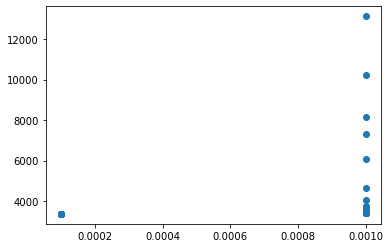

In [71]:
import matplotlib.pyplot as plt
plt.scatter(history.history["lr"], history.history["loss"])